In [2]:
import numpy as np
import pandas as pd

In [3]:
# P 2.1 , 2.2

df=pd.read_csv('vehicle.csv')
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [4]:
#  P 2.3
print(pd.unique(df["Class"]))

['van' 'saab' 'bus' 'opel']


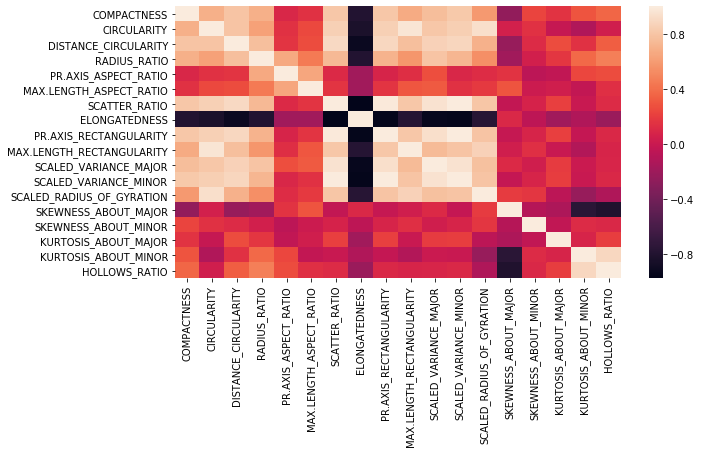

In [6]:
#  P 2.4
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

In [7]:
#  P 2.5
X=df.loc[:,df.columns!="Class"]
Y=df["Class"]

In [8]:
# P 2.6
import sklearn.model_selection as model
x_train,x_test,y_train,y_test=model.train_test_split(X,Y,test_size=0.2)

In [9]:
# P 2.7
from sklearn.tree import DecisionTreeClassifier
decTree=DecisionTreeClassifier(max_depth = 5, max_features=4, criterion='entropy')
decTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [17]:
#  P 2.8
import random
from scipy.stats import randint
Params = {"max_depth":[3 , None],
         "max_features": randint(1,9),
         "min_samples_leaf": randint(1,9)}
print(Params)

{'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB90FC6470>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB90FC6588>}


In [26]:
# P2.9
from sklearn.model_selection import RandomizedSearchCV
tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, Params, cv=5)

tree_cv.fit(X, Y)



D:\program file\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB90FC6470>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DB90FC6588>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [25]:
# P2.10
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 7}
Best score is 0.6855791962174941


In [20]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = None, max_features=6, min_samples_leaf=8)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=8,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [22]:

y_pred = clf_entropy.predict(x_test)
y_pred

array(['saab', 'van', 'saab', 'van', 'bus', 'van', 'van', 'saab', 'opel',
       'saab', 'bus', 'saab', 'van', 'van', 'van', 'opel', 'opel', 'opel',
       'saab', 'van', 'opel', 'opel', 'bus', 'bus', 'opel', 'van', 'saab',
       'van', 'saab', 'bus', 'saab', 'opel', 'bus', 'opel', 'opel', 'bus',
       'van', 'saab', 'saab', 'saab', 'opel', 'opel', 'opel', 'bus',
       'van', 'opel', 'bus', 'opel', 'opel', 'opel', 'van', 'saab',
       'saab', 'opel', 'van', 'bus', 'opel', 'opel', 'van', 'van', 'opel',
       'bus', 'saab', 'bus', 'opel', 'van', 'saab', 'saab', 'opel', 'bus',
       'van', 'opel', 'saab', 'bus', 'bus', 'opel', 'opel', 'opel', 'bus',
       'opel', 'van', 'van', 'saab', 'van', 'bus', 'opel', 'saab', 'opel',
       'saab', 'bus', 'saab', 'bus', 'opel', 'saab', 'opel', 'van', 'van',
       'van', 'opel', 'saab', 'opel', 'opel', 'opel', 'bus', 'van',
       'opel', 'van', 'saab', 'van', 'bus', 'van', 'van', 'saab', 'opel',
       'saab', 'opel', 'opel', 'saab', 'opel', 

In [27]:
#  P2.11
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  62.35294117647059


In [28]:
# P2.13
fimportant = dict(zip(df.columns, clf_entropy.feature_importances_))
for key,val in fimportant.items():
    print(key, "=>", val)

COMPACTNESS => 0.057243604187455936
CIRCULARITY => 0.021646551795873187
DISTANCE_CIRCULARITY => 0.0331075292040589
RADIUS_RATIO => 0.0
PR.AXIS_ASPECT_RATIO => 0.06292942492213029
MAX.LENGTH_ASPECT_RATIO => 0.11923060972148906
SCATTER_RATIO => 0.021075929214674386
ELONGATEDNESS => 0.19069324997836132
PR.AXIS_RECTANGULARITY => 0.0
MAX.LENGTH_RECTANGULARITY => 0.08826263261284722
SCALED_VARIANCE_MAJOR => 0.0
SCALED_VARIANCE_MINOR => 0.19412643509730335
SCALED_RADIUS_OF_GYRATION => 0.014039747171418277
SKEWNESS_ABOUT_MAJOR => 0.07560526810188511
SKEWNESS_ABOUT_MINOR => 0.0019039046049978466
KURTOSIS_ABOUT_MAJOR => 0.026054267154103403
KURTOSIS_ABOUT_MINOR => 0.07847339011861136
HOLLOWS_RATIO => 0.015607456114790403


In [42]:
# P2.14
from sklearn import tree
import pydotplus
import collections
from sklearn.tree import export_graphviz
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

dot_data = tree.export_graphviz(clf_entropy,
                                feature_names=df.iloc[0,0:-1],
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('dot_data.png')
Image('dot_data.png')

InvocationException: GraphViz's executables not found